In [3]:
#load and prepare

import pandas as pd
import numpy as np
from scipy import stats

# Load datasets
df = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_demo.txt')
df1 = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_experiment_clients.txt')
df2 = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_web_data_pt_1.txt')
df3 = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_web_data_pt_2.txt')

# Combine web data parts
combined_df = pd.concat([df2, df3], ignore_index=True)

# Merge datasets
merged_data = pd.merge(df1, combined_df, on='client_id')
merged_data = pd.merge(merged_data, df, on='client_id')

# Separate Control and Test groups
control_group = merged_data[merged_data['Variation'] == 'Control']
test_group = merged_data[merged_data['Variation'] == 'Test']

# Calculate completion rates
control_completion_rate = control_group[control_group['process_step'] == 'confirm'].shape[0] / control_group.shape[0]
test_completion_rate = test_group[test_group['process_step'] == 'confirm'].shape[0] / test_group.shape[0]

print(f"Control Group Completion Rate: {control_completion_rate}")
print(f"Test Group Completion Rate: {test_completion_rate}")

Control Group Completion Rate: 0.12201837420362187
Test Group Completion Rate: 0.1446299347191687


In [5]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of successes (completed processes)
n_control = len(control_group)
n_test = len(test_group)
successes = np.array([
    control_group[control_group['process_step'] == 'confirm'].shape[0],
    test_group[test_group['process_step'] == 'confirm'].shape[0]
])

# Perform z-test
z_stat, p_value = proportions_ztest(successes, [n_control, n_test])

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -18.67324116863663
P-value: 8.173840595991908e-78


In [ ]:
#This negative Z-statistic indicates that the completion rate in the Test group (new UI) 
#is significantly lower than in the Control group (traditional UI). 
#A negative value suggests that the completion rate in the Test group is less than what 
#would be expected if there were no difference between the groups.

#This very small p-value (<< 0.05 or 0.01) indicates strong evidence against the null hypothesis. 
#Specifically, it suggests that the observed difference in completion rates between the Control 
#and Test groups is highly unlikely to have occurred due to random chance alone.

#Based on these results, you would likely advise Vanguard that the new UI design did not lead to a 
#higher completion rate compared to the traditional UI. The decision to reject the null hypothesis 
#suggests that the differences observed in the completion rates are likely due to the effect of 
#the UI design change and not due to random chance.

In [9]:
from scipy.stats import ttest_ind, chi2_contingency

combined_df23 = pd.concat([df2, df3], ignore_index=True)
merged_data = pd.merge(df, df1, on='client_id')
merged_data = pd.merge(merged_data, combined_df23, on='client_id')

# Separate Control and Test groups
control_group = merged_data[merged_data['Variation'] == 'Control']
test_group = merged_data[merged_data['Variation'] == 'Test']

# Hypothesis Testing for Age
t_stat_age, p_value_age = ttest_ind(control_group['clnt_age'], test_group['clnt_age'])
print(f"Age - T-statistic: {t_stat_age:.4f}, P-value: {p_value_age:.4f}")

# Hypothesis Testing for Tenure (Months)
t_stat_tenure, p_value_tenure = ttest_ind(control_group['clnt_tenure_mnth'], test_group['clnt_tenure_mnth'])
print(f"Tenure (Months) - T-statistic: {t_stat_tenure:.4f}, P-value: {p_value_tenure:.4f}")

# Hypothesis Testing for Gender
gender_table = pd.crosstab(merged_data['Variation'], merged_data['gendr'])
chi2_stat, p_value_gender, dof, expected = chi2_contingency(gender_table)
print(f"Gender - Chi-square Statistic: {chi2_stat:.4f}, P-value: {p_value_gender:.4f}")


Age - T-statistic: nan, P-value: nan
Tenure (Months) - T-statistic: nan, P-value: nan
Gender - Chi-square Statistic: 54.2977, P-value: 0.0000


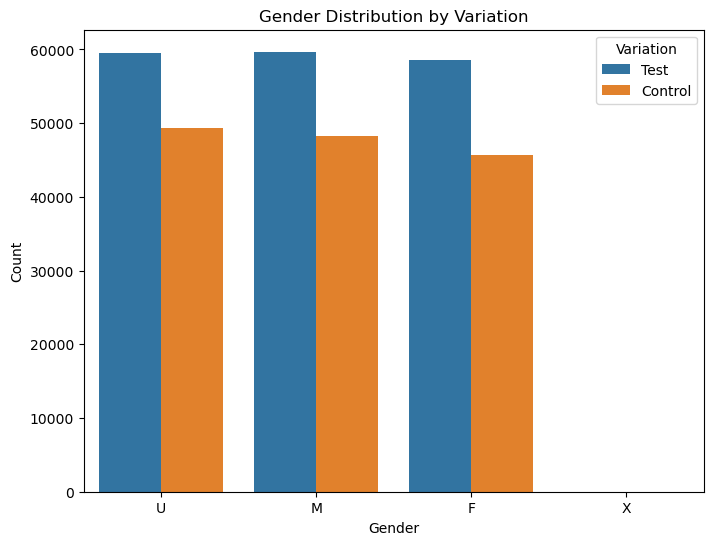

gendr          F      M      U  X
Variation                        
Control    45737  48323  49360  0
Test       58565  59690  59524  8


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of gender distribution by variation
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='gendr', hue='Variation')
plt.title('Gender Distribution by Variation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Variation')
plt.show()


# Crosstabulation of gender by variation
gender_table = pd.crosstab(merged_data['Variation'], merged_data['gendr'])
print(gender_table)

In [20]:
print(df['clnt_age'].dtype)
print(df['clnt_tenure_mnth'].dtype)
df['clnt_age'] = pd.to_numeric(df['clnt_age'], errors='coerce')
df['clnt_tenure_mnth'] = pd.to_numeric(df['clnt_tenure_mnth'], errors='coerce')
df.dropna(subset=['clnt_age', 'clnt_tenure_mnth'], inplace=True)

# Separate Control and Test groups
control_group = merged_data[merged_data['Variation'] == 'Control']
test_group = merged_data[merged_data['Variation'] == 'Test']

# Hypothesis Testing for Age
t_stat_age, p_value_age = ttest_ind(control_group['clnt_age'], test_group['clnt_age'])
print(f"Age - T-statistic: {t_stat_age:.4f}, P-value: {p_value_age:.4f}")

# Hypothesis Testing for Tenure (Months)
t_stat_tenure, p_value_tenure = ttest_ind(control_group['clnt_tenure_mnth'], test_group['clnt_tenure_mnth'])
print(f"Tenure (Months) - T-statistic: {t_stat_tenure:.4f}, P-value: {p_value_tenure:.4f}")

float64
float64
Age - T-statistic: nan, P-value: nan
Tenure (Months) - T-statistic: nan, P-value: nan


[60.5 58.  32.  49.  33.  30.5 58.5 57.5 67.5 54.5 34.5 51.5 62.5 36.
 74.  32.5 31.  25.5 42.5 42.  30.  55.  38.  68.5 52.5 54.  63.  48.
 66.5 68.  65.  51.  46.  63.5 23.  26.5 56.5 76.5 27.5 39.5 25.  27.
 60.  66.  39.  56.  40.  52.  31.5 43.5 35.  19.  64.5 64.  22.5 33.5
 36.5 61.  40.5 72.  44.5 28.5 59.5 45.  18.  78.  50.5 29.  37.5 57.
 70.  74.5 22.  50.  53.  62.  65.5 29.5 28.  69.5 35.5 71.5 34.  38.5
 69.  43.  83.5 21.5 47.  61.5 73.5 71.  59.  21.  44.  83.  47.5 72.5
 76.  78.5 55.5 67.  41.5 20.5 75.  24.  79.  26.  41.  23.5 49.5 46.5
 45.5 48.5 24.5 75.5 80.  73.  87.  19.5 53.5 18.5 70.5 80.5 86.  37.
 85.  17.5 82.  20.  77.5 77.  79.5 88.5 96.  81.  81.5 88.  84.   nan
 94.5 89.  92.  82.5 91.5 85.5 95.5 84.5 90.  89.5 93.  90.5 87.5 93.5
 86.5 91.  17.  94.  92.5 15.5 16.  16.5 14.5 15.  14.  13.5]
[ 73.  94.  64. 198. 145.  71.  66. 361. 369. 189. 100.  99.  67. 193.
  58.  47. 122. 136. 101. 103.  70. 152. 160.  80.  88.  86.  65.  68.
  93.  85. 168. 142.

In [24]:
import pandas as pd
from datetime import datetime

# Assuming merged_data is your DataFrame with required columns

# Convert timestamp to datetime if not already
merged_data['date_time'] = pd.to_datetime(merged_data['date_time'])

# Sort data by client_id, visit_id, and timestamp
merged_data.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)

# Calculate time differences between consecutive steps for each visit
merged_data['step_duration'] = merged_data.groupby(['Variation', 'client_id', 'visit_id'])['date_time'].diff()

# Convert step_duration to seconds for easier averaging
merged_data['step_duration_seconds'] = merged_data['step_duration'].dt.total_seconds()

# Drop NaN values (for the first step of each visit)
merged_data.dropna(subset=['step_duration_seconds'], inplace=True)

# Define the process steps in order
process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Calculate average time spent on each step for Control and Test groups separately
avg_time_per_step = {}

for group_name, group_data in merged_data.groupby('Variation'):
    avg_time_per_step[group_name] = {}
    for step in process_steps:
        avg_time_per_step[group_name][step] = group_data[group_data['process_step'] == step]['step_duration_seconds'].mean()

# Print average time spent on each step for Control and Test groups
print("Average time spent on each step for Control and Test groups:")
for group_name, step_times in avg_time_per_step.items():
    print(f"{group_name}:")
    for step, avg_time in step_times.items():
        print(f" - {step}: {avg_time:.2f} seconds")

Average time spent on each step for Control and Test groups:
Control:
 - start: 179.91 seconds
 - step_1: 54.37 seconds
 - step_2: 43.93 seconds
 - step_3: 91.66 seconds
 - confirm: 127.63 seconds
Test:
 - start: 156.33 seconds
 - step_1: 49.10 seconds
 - step_2: 62.82 seconds
 - step_3: 96.58 seconds
 - confirm: 126.08 seconds
